# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [91]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

In [92]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df.sample(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
297050,36.0,12.0,12042017,12,4,2017,1100.0,2017005521,2.017006e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,88.0,88.0,NaN,1.0,3.0,2.0,2.0,3.0,NaN,5.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,9.0,88.0,8.0,1.0,100.0,502.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,888.0,NaN,NaN,NaN,201.0,201.0,201.0,201.0,201.0,202.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [93]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

In [94]:
df['PHYSHLTH'].sample(10)

296371     2.0
278918    88.0
282896    88.0
58981     88.0
279340    88.0
51029     88.0
281588    30.0
276522    88.0
281619    88.0
275495    88.0
Name: PHYSHLTH, dtype: float64

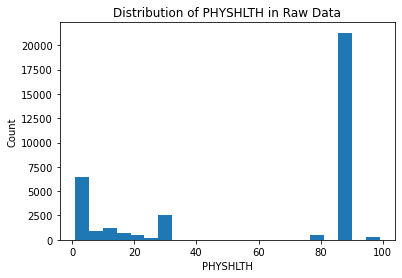

In [95]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [96]:
# Replace None with appropriate text
"""
. Uneven Bin Sizes: One of the most prominent issues with this histogram is that the bin sizes are uneven. 
    In a histogram, each bin should represent a consistent and equal range of data. However, in this histogram, some bins are much smaller, 
    while one is significantly larger. The inconsistency in bin sizes makes it difficult to interpret the distribution of the data effectively. 
    It doesn't follow the principle of creating a clear and fair representation of data.

. Lack of Interpretability: Histograms are meant to provide an intuitive and visual representation of the data distribution. 
    The uneven bin sizes create confusion and hinder the ability to understand the underlying data patterns. Without equally sized bins, 
    it's challenging to discern which data values are more common or less common.

. Outlier Handling: The histogram suggests that there might be an unusual spike in data points around the 85 mark. 
    This is a potential red flag. If "PHYSHLTH" is supposed to represent the number of days with bad physical health out of the past 30 days, 
    it's highly unusual to see a large number like 85 in this context. This could indicate a data quality issue, an outlier, 
    or a specific meaning that hasn't been adequately explained.

. Inadequate Data Exploration: The primary purpose of creating a histogram is to explore the distribution of data. 
    This histogram doesn't fulfill that purpose effectively due to the irregular bin sizes. 
    It's essential to understand how the data is spread out and whether there are any trends or patterns. 
    The current histogram doesn't provide this clarity.

. Misleading Representation: Because of the uneven bin sizes and potential outliers, this histogram might mislead viewers. 
    They could draw incorrect conclusions about the data distribution, which is counterproductive when trying to understand and analyze the dataset.

"""

'\n. Uneven Bin Sizes: One of the most prominent issues with this histogram is that the bin sizes are uneven. \n    In a histogram, each bin should represent a consistent and equal range of data. However, in this histogram, some bins are much smaller, \n    while one is significantly larger. The inconsistency in bin sizes makes it difficult to interpret the distribution of the data effectively. \n    It doesn\'t follow the principle of creating a clear and fair representation of data.\n\n. Lack of Interpretability: Histograms are meant to provide an intuitive and visual representation of the data distribution. \n    The uneven bin sizes create confusion and hinder the ability to understand the underlying data patterns. Without equally sized bins, \n    it\'s challenging to discern which data values are more common or less common.\n\n. Outlier Handling: The histogram suggests that there might be an unusual spike in data points around the 85 mark. \n    This is a potential red flag. If "

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [97]:
df = df.loc[(df["PHYSHLTH"]>=1)&(df["PHYSHLTH"]<=30)]

Run the code below to ensure you have the correct, cleaned dataframe:

In [98]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (12451, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

In [99]:
df["PHYSHLTH"].value_counts()

30.0    2438
2.0     1993
1.0     1538
3.0     1187
5.0     1092
10.0     751
7.0      641
15.0     640
4.0      622
20.0     402
14.0     326
6.0      187
25.0     159
8.0       99
21.0      70
12.0      69
28.0      57
29.0      35
27.0      22
18.0      19
16.0      16
9.0       15
17.0      15
22.0      12
13.0      10
19.0      10
11.0       8
24.0       7
26.0       7
23.0       4
Name: PHYSHLTH, dtype: int64

Now we can look at the same descriptive information on our cleaned data:

In [100]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    12451.000000
mean        11.072846
std         10.911940
min          1.000000
25%          2.000000
50%          5.000000
75%         20.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

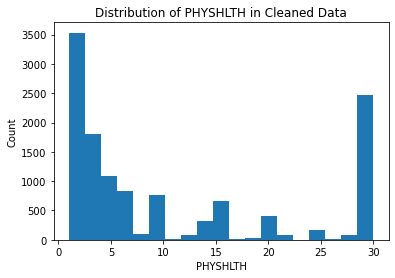

In [101]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins ='auto')
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [102]:
# Run this cell without changes
df["_STATE"].value_counts()

36.0    4662
34.0    4155
9.0     3634
Name: _STATE, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [103]:
# Your code here
State_names = {36: 'New York', 34: 'New Jersey', 9 : 'Connecticut'}
df["_STATE"] = df["_STATE"].map(State_names)


In [104]:
df["_STATE"].value_counts()

New York       4662
New Jersey     4155
Connecticut    3634
Name: _STATE, dtype: int64

Below, we check the values:

In [105]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (12451, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

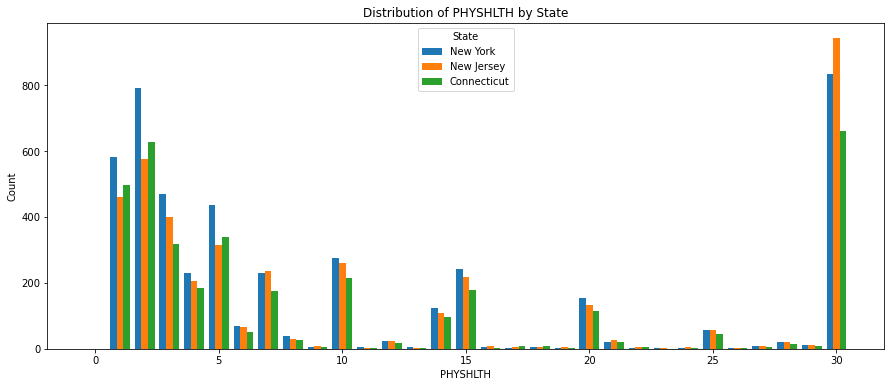

In [106]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [107]:
# Replace None with appropriate text
"""
The distribution of "PHYSHLTH" by state, as observed visually, reveals significant differences. 
In New York, there is a noticeable higher average value for "PHYSHLTH" compared to New Jersey and Connecticut. 
Additionally, in New York, the majority of individuals report experiencing 5 days or fewer of bad physical health, with a distinct spike at 1 day. 
Interestingly, there is a common occurrence across all three states, marked by a significant spike in "PHYSHLTH" values at 30 days, 
suggesting that individuals may tend to report their health status for an entire month, even when they haven't experienced any health issues. 
These visual disparities in the distribution of health status data by state highlight the need for 
    a more in-depth statistical analysis to better understand the underlying factors driving these variations.

"""

'\nThe distribution of "PHYSHLTH" by state, as observed visually, reveals significant differences. \nIn New York, there is a noticeable higher average value for "PHYSHLTH" compared to New Jersey and Connecticut. \nAdditionally, in New York, the majority of individuals report experiencing 5 days or fewer of bad physical health, with a distinct spike at 1 day. \nInterestingly, there is a common occurrence across all three states, marked by a significant spike in "PHYSHLTH" values at 30 days, \nsuggesting that individuals may tend to report their health status for an entire month, even when they haven\'t experienced any health issues. \nThese visual disparities in the distribution of health status data by state highlight the need for \n    a more in-depth statistical analysis to better understand the underlying factors driving these variations.\n\n'

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.


Let's look at those means:

In [108]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    10.569345
New Jersey     12.081107
New York       10.566710
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [109]:
# Replace None with appropriate text
"""
To determine if the difference in mean PHYSHLTH across states is statistically significant, a suitable statistical test would be 
    the Analysis of Variance (ANOVA). ANOVA is the most appropriate choice in this case because it is used for comparing more than 
    two categories of a numeric feature, which aligns with the three states we have (Connecticut, New Jersey, and New York). 
The variable being compared is PHYSHLTH, a numeric variable that represents the number of days with bad physical health in the past month.
ANOVA will allow us to assess whether there is a statistically significant difference in the means of PHYSHLTH among these three 
    categories (states). If the p-value from the ANOVA test is less than a predefined significance level (e.g., 0.05), 
    it would indicate that at least one of the states significantly differs from the others in terms of the average number of bad health days.
Subsequent post hoc tests, if necessary, can help identify which specific state pairs have significant differences.
Given the business context of Flatiron Health Insurance (FHI) and the question at hand, ANOVA can provide insights into regional variations 
    in health status, which may be valuable for tailoring insurance offerings and care to the needs of patients in different states.
"""

'\nTo determine if the difference in mean PHYSHLTH across states is statistically significant, a suitable statistical test would be \n    the Analysis of Variance (ANOVA). ANOVA is the most appropriate choice in this case because it is used for comparing more than \n    two categories of a numeric feature, which aligns with the three states we have (Connecticut, New Jersey, and New York). \nThe variable being compared is PHYSHLTH, a numeric variable that represents the number of days with bad physical health in the past month.\nANOVA will allow us to assess whether there is a statistically significant difference in the means of PHYSHLTH among these three \n    categories (states). If the p-value from the ANOVA test is less than a predefined significance level (e.g., 0.05), \n    it would indicate that at least one of the states significantly differs from the others in terms of the average number of bad health days.\nSubsequent post hoc tests, if necessary, can help identify which speci

Now, identify the null and alternative hypotheses:

In [110]:
# Replace None with appropriate text
"""
Null Hypothesis (H0): There is no statistically significant difference in the mean PHYSHLTH among the three states.
Alternative Hypothesis (Ha): There is a statistically significant difference in the mean PHYSHLTH among at least one pair of states. 
"""

'\nNull Hypothesis (H0): There is no statistically significant difference in the mean PHYSHLTH among the three states.\nAlternative Hypothesis (Ha): There is a statistically significant difference in the mean PHYSHLTH among at least one pair of states. \n'

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [111]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,6.339484e+03,3169.741904,26.730765,2.605158e-12
Residual,12448.0,1.476087e+06,118.580290,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [112]:
# Replace None with appropriate text
"""
The statistical test conducted is an Analysis of Variance (ANOVA) to compare the means of PHYSHLTH among the three states (Connecticut, New Jersey, and New York). 
The null hypothesis (H0) for the ANOVA test assumes that there is no statistically significant difference in the mean PHYSHLTH among the three states. 
The low p-value obtained from the test (much smaller than the alpha of 0.05) indicates strong evidence against the null hypothesis. 
Therefore, we can reject the null hypothesis.

This suggests that there is a statistically significant difference in the mean PHYSHLTH among at least one pair of states. 

Recommendations to the business:
1. FHI should acknowledge that there is a significant variation in health status, as measured by the number of bad health days (PHYSHLTH), 
        among residents of Connecticut, New Jersey, and New York.
2. Further investigation should be conducted to understand the specific factors contributing to these variations in health status by state. 
        This could include demographic, behavioral, and environmental factors that may differ between the states.
3. Tailored health insurance offerings and programs can be designed to address the unique health needs of residents in each state, 
        taking into account the variations observed.
4. Marketing strategies and campaigns can also be customized to target specific health concerns prevalent in each state.
"""

'\nThe statistical test conducted is an Analysis of Variance (ANOVA) to compare the means of PHYSHLTH among the three states (Connecticut, New Jersey, and New York). \nThe null hypothesis (H0) for the ANOVA test assumes that there is no statistically significant difference in the mean PHYSHLTH among the three states. \nThe low p-value obtained from the test (much smaller than the alpha of 0.05) indicates strong evidence against the null hypothesis. \nTherefore, we can reject the null hypothesis.\n\nThis suggests that there is a statistically significant difference in the mean PHYSHLTH among at least one pair of states. \n\nRecommendations to the business:\n1. FHI should acknowledge that there is a significant variation in health status, as measured by the number of bad health days (PHYSHLTH), \n        among residents of Connecticut, New Jersey, and New York.\n2. Further investigation should be conducted to understand the specific factors contributing to these variations in health stat

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [113]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

1.0    7337
2.0    4378
3.0     631
9.0      72
7.0      33
Name: RENTHOM1, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [114]:
df["RENTHOM1"].isnull().sum()

0

In [115]:
# Your code here
mapper = {1:'Own',2:'Rent'}

df["RENTHOM1"] = df["RENTHOM1"].map(mapper)

df["RENTHOM1"].value_counts()

Own     7337
Rent    4378
Name: RENTHOM1, dtype: int64

In [116]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

Own     7337
Rent    4378
Name: RENTHOM1, dtype: int64

In [117]:
df.shape

(12451, 358)

Below, we check that this was done correctly:

In [118]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (12451, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

In [119]:
# Filter the DataFrame for those who own and rent their homes
own_df = df[df["RENTHOM1"] == "Own"]
rent_df = df[df["RENTHOM1"] == "Rent"]

In [120]:
own_df['RENTHOM1'].sample(5)

279067    Own
56740     Own
51628     Own
55769     Own
275306    Own
Name: RENTHOM1, dtype: object

In [121]:
rent_df['RENTHOM1'].sample(10)

295826    Rent
52319     Rent
282901    Rent
294914    Rent
279746    Rent
300247    Rent
59423     Rent
300988    Rent
302251    Rent
58096     Rent
Name: RENTHOM1, dtype: object

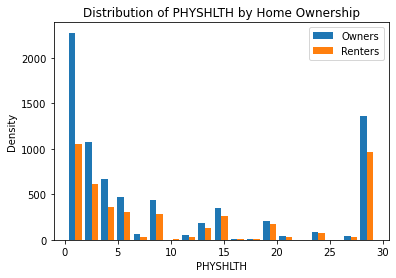

In [122]:
# Create subplots
fig, ax = plt.subplots()

# Plot histograms for those who own and rent their homes with different colors
ax.hist(
    x=[own_df['PHYSHLTH'], rent_df['PHYSHLTH']],
    label=["Owners", "Renters"],
    bins='auto',
    align="left"
)

# Set axis labels
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Density")
ax.set_title("Distribution of PHYSHLTH by Home Ownership")
ax.legend()

plt.show()

Then run this code to find the averages:

In [123]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     10.439144
Rent    12.162631
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [124]:
# Replace None with appropriate text
"""
Based on the side-by-side histograms and averages, it does seem like there is a difference in the number of unhealthy days between those who rent 
    their homes and those who own their homes. Here are some key observations:
Owners vs. Renters:
    Owners (left histogram) generally have a higher density of individuals reporting fewer unhealthy days (e.g., 0-5 days) 
    compared to renters (right histogram).
    The peak for owners is around 0-1 unhealthy days, while for renters, it's around 3-4 unhealthy days.
    There is a longer tail on the right histogram for renters, indicating a smaller proportion of individuals who report more 
    unhealthy days (e.g., 20-30 days) compared to owners.
Averages:
    The average number of unhealthy days (PHYSHLTH) for individuals who own their homes is approximately 10.44 days, 
    while for those who rent their homes, it's approximately 12.16 days. 
    This indicates that, on average, renters tend to report a slightly higher number of unhealthy days compared to homeowners. 
    The 1.72-day difference in averages suggests a modest health disparity between these two groups, 
    with renters experiencing more unhealthy days, on average, than homeowners.
When comparing the distributions by state, it appears that the differences in the number of unhealthy days between states are 
    somewhat more significant than the differences between owners and renters.
In the state-level distributions, New York had a higher average number of unhealthy days compared to New Jersey and Connecticut. 
In contrast, the difference between owners and renters, while noticeable, might be less pronounced.
It's essential to consider both factors (homeownership and state) when analyzing health status, as they seem to 
    independently contribute to variations in the number of unhealthy days.
Overall, this analysis suggests that homeowners, on average, report fewer unhealthy days compared to renters. 
"""

"\nBased on the side-by-side histograms and averages, it does seem like there is a difference in the number of unhealthy days between those who rent \n    their homes and those who own their homes. Here are some key observations:\nOwners vs. Renters:\n    Owners (left histogram) generally have a higher density of individuals reporting fewer unhealthy days (e.g., 0-5 days) \n    compared to renters (right histogram).\n    The peak for owners is around 0-1 unhealthy days, while for renters, it's around 3-4 unhealthy days.\n    There is a longer tail on the right histogram for renters, indicating a smaller proportion of individuals who report more \n    unhealthy days (e.g., 20-30 days) compared to owners.\nAverages:\n    The average number of unhealthy days (PHYSHLTH) for individuals who own their homes is approximately 10.44 days, \n    while for those who rent their homes, it's approximately 12.16 days. \n    This indicates that, on average, renters tend to report a slightly higher num

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [125]:
# Your code here (create additional cells as needed)
"""
    Null Hypothesis (H0): There is no statistically significant difference in the mean number of unhealthy days (PHYSHLTH) 
        between individuals who own their homes and those who rent their homes.
    Alternative Hypothesis (Ha): There is a statistically significant difference in the mean number of unhealthy days (PHYSHLTH) 
        between individuals who own their homes and those who rent their homes.

"""

'\n    Null Hypothesis (H0): There is no statistically significant difference in the mean number of unhealthy days (PHYSHLTH) \n        between individuals who own their homes and those who rent their homes.\n    Alternative Hypothesis (Ha): There is a statistically significant difference in the mean number of unhealthy days (PHYSHLTH) \n        between individuals who own their homes and those who rent their homes.\n\n'

In [126]:
from scipy import stats

owners_data = df[df["RENTHOM1"] == "Own"]["PHYSHLTH"]
renters_data = df[df["RENTHOM1"] == "Rent"]["PHYSHLTH"]

t_statistic, p_value = stats.ttest_ind(owners_data, renters_data)

print("t-statistic:", t_statistic)
print("\np-value:", p_value)


alpha = 0.05

if p_value < alpha:
    print("\nWe reject the null hypothesis (H0).")
else:
    print("\nWe fail to reject the null hypothesis (H0).")
 
if t_statistic < 0:
    print("\nrenters report a higher average number of unhealthy days compared to homeowners.")
else:
    print("\nhomeowners report a higher average number of unhealthy days compared to renters.")

t-statistic: -8.299516203772821

p-value: 1.1596882681589714e-16

We reject the null hypothesis (H0).

renters report a higher average number of unhealthy days compared to homeowners.


## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [127]:
for column in df.columns:
    print(column)

_STATE
FMONTH
IDATE
IMONTH
IDAY
IYEAR
DISPCODE
SEQNO
_PSU
CTELENM1
PVTRESD1
COLGHOUS
STATERE1
CELLFON4
LADULT
NUMADULT
NUMMEN
NUMWOMEN
SAFETIME
CTELNUM1
CELLFON5
CADULT
PVTRESD3
CCLGHOUS
CSTATE1
LANDLINE
HHADULT
GENHLTH
PHYSHLTH
MENTHLTH
POORHLTH
HLTHPLN1
PERSDOC2
MEDCOST
CHECKUP1
BPHIGH4
BPMEDS
CHOLCHK1
TOLDHI2
CHOLMED1
CVDINFR4
CVDCRHD4
CVDSTRK3
ASTHMA3
ASTHNOW
CHCSCNCR
CHCOCNCR
CHCCOPD1
HAVARTH3
ADDEPEV2
CHCKIDNY
DIABETE3
DIABAGE2
LMTJOIN3
ARTHDIS2
ARTHSOCL
JOINPAI1
SEX
MARITAL
EDUCA
RENTHOM1
NUMHHOL2
NUMPHON2
CPDEMO1A
VETERAN3
EMPLOY1
CHILDREN
INCOME2
INTERNET
WEIGHT2
HEIGHT3
PREGNANT
DEAF
BLIND
DECIDE
DIFFWALK
DIFFDRES
DIFFALON
SMOKE100
SMOKDAY2
STOPSMK2
LASTSMK2
USENOW3
ECIGARET
ECIGNOW
ALCDAY5
AVEDRNK2
DRNK3GE5
MAXDRNKS
FRUIT2
FRUITJU2
FVGREEN1
FRENCHF1
POTATOE1
VEGETAB2
EXERANY2
EXRACT11
EXEROFT1
EXERHMM1
EXRACT21
EXEROFT2
EXERHMM2
STRENGTH
SEATBELT
FLUSHOT6
FLSHTMY2
PNEUVAC3
SHINGLE2
HIVTST6
HIVTSTD3
HIVRISK5
PDIABTST
PREDIAB1
INSULIN
BLDSUGAR
FEETCHK2
DOCTDIAB
CHKHEMO3
FEETCH

In [128]:
# Your code here
df["NICOTINE_USE"] = 0

smoke_condition = (df["SMOKE100"] == 1)
chewing_tobacco_condition = ((df["USENOW3"] == 1) | (df["USENOW3"] == 2))
ecigarette_condition = (df["ECIGARET"] == 1)


for index, row in df.iterrows():
    if smoke_condition[index] or chewing_tobacco_condition[index] or ecigarette_condition[index]:
        df.at[index, "NICOTINE_USE"] = 1
        
df["NICOTINE_USE"].value_counts(normalize=True)

0    0.519798
1    0.480202
Name: NICOTINE_USE, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [129]:
# Your code here

df["CHRONIC"] = df["PHYSHLTH"].apply(lambda x: 1 if x >= 15 else 0)

# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

0    8538
1    3913
Name: CHRONIC, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [130]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,4725,3813
1,1747,2166


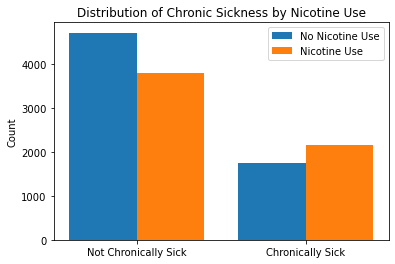

In [131]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [132]:
# Your code here (create additional cells as needed)

"""
In this analysis, we are examining the relationship between two categorical features, each with two distinct categories. 
To determine whether there is an association between chronic sickness and nicotine use, we employ a chi-squared test. 
This test is suitable because it allows us to assess whether the observed proportions in these categories differ significantly 
    from what would be expected by chance.

Null Hypothesis: The null hypothesis posits that chronic sickness and nicotine use are independent. 
Alternative Hypothesis: The alternative hypothesis suggests that chronic sickness and nicotine use are not independent.

"""

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["CHRONIC"], df["NICOTINE_USE"])

chi2, p, _, _ = chi2_contingency(contingency_table)


alpha = 0.05
if p < alpha:
    print("There is a significant association between chronic sickness and nicotine use.")
else:
    print("There is no significant association between chronic sickness and nicotine use.")

There is a significant association between chronic sickness and nicotine use.


## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

In [ ]:
# Your code here (create additional cells as needed)

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.